In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

NUM_STUDENTS = 500
DAYS = 30

np.random.seed(42)


In [ ]:
def generate_study_hours():
    # normal_study
    hours = np.random.normal(3.5, 1.5)

    # rare_case of only studying
    if np.random.rand() < 0.08:
        hours = np.random.uniform(7, 10)

    return np.clip(hours, 0.5, 10)


def generate_sleep_hours(study_hours):
    # normal_sleep
    sleep = np.random.normal(7, 1)

    # extreme_sleep_derivation
    if np.random.rand() < 0.1:
        sleep = np.random.uniform(1, 4)
    #more study => less sleep
    if study_hours > 6:
        sleep -= np.random.uniform(0.5, 2)

    return np.clip(sleep, 1, 10)


def generate_breaks(study_hours):
    breaks = study_hours + np.random.randint(-2, 3)

    # extreme_distraction
    if np.random.rand() < 0.07:
        breaks += np.random.randint(3, 6)

    breaks = int(np.clip(breaks, 1, 10))
    avg_break = np.clip(np.random.normal(10, 5), 5, 40)

    return breaks, avg_break



In [ ]:
# watching yt, reels (not studying screen time)
def generate_screen_time():
    screen = np.random.normal(4, 1.5)

    # high_screen_addiction
    if np.random.rand() < 0.1:
        screen = np.random.uniform(7, 12)

    return np.clip(screen, 1, 12)


In [ ]:
def compute_performance(study_hours, sleep, difficulty, revision, mood):
    score = (
        0.35 * study_hours * 10 +
        0.25 * sleep * 10 +
        0.20 * revision * 100 +
        0.15 * mood * 20 -
        0.15 * difficulty * 10
    )

    noise = np.random.normal(0, 5)
    return int(np.clip(score + noise, 0, 100))


In [ ]:
def compute_burnout(study_hours, sleep, breaks, screen):
    risk = (
        0.45 * study_hours -
        0.40 * sleep +
        0.25 * breaks +
        0.15 * screen
    )
    return 1 if risk > 3.8 else 0



In [ ]:
records = []
start_date = datetime.today() - timedelta(days=DAYS)

for student_id in range(1, NUM_STUDENTS + 1):
    for day in range(DAYS):
        date = start_date + timedelta(days=day)

        study_hours = generate_study_hours()
        sleep_hours = generate_sleep_hours(study_hours)
        break_count, avg_break = generate_breaks(study_hours)
        screen_time = generate_screen_time()

        difficulty = np.random.randint(1, 6)
        revision_done = np.random.choice([0, 1], p=[0.6, 0.4])
        mood_score = np.random.randint(1, 6) #higher mood => more happy

        performance = compute_performance(
            study_hours, sleep_hours,
            difficulty, revision_done, mood_score
        )

        burnout = compute_burnout(
            study_hours, sleep_hours,
            break_count, screen_time
        )

        records.append([
            student_id,
            date.strftime("%Y-%m-%d"),
            difficulty,
            round(study_hours, 2),
            break_count,
            round(avg_break, 1),
            round(sleep_hours, 2),
            round(screen_time, 2),
            revision_done,
            mood_score,
            performance,
            burnout
        ])


In [ ]:
columns = [
    "student_id",
    "date",
    "difficulty_level",
    "study_hours",
    "break_count",
    "avg_break_duration",
    "sleep_hours",
    "screen_time",
    "revision_done",
    "mood_score",
    "performance_score",
    "burnout_risk"
]

df = pd.DataFrame(records, columns=columns)

df.to_csv("data/study_data_generalized.csv", index=False)
df.head(15)



,student_id,date,difficulty_level,study_hours,break_count,avg_break_duration,sleep_hours,screen_time,revision_done,mood_score,performance_score,burnout_risk
0,1,2025-11-17,4,4.25,3,17.9,6.86,11.85,1,2,49,0
1,1,2025-11-18,4,2.80,2,14.8,4.39,3.62,0,1,16,0
2,1,2025-11-19,4,3.68,4,9.3,3.85,3.95,0,4,25,0
3,1,2025-11-20,4,3.49,2,5.0,7.82,1.00,0,5,35,0
4,1,2025-11-21,1,1.28,2,5.2,6.28,2.43,1,1,44,0
5,1,2025-11-22,3,4.83,5,8.5,6.16,3.73,0,3,34,0
6,1,2025-11-23,2,0.50,2,9.8,8.07,6.35,0,5,34,0
7,1,2025-11-24,2,3.33,5,12.9,8.79,6.43,1,1,57,0
8,1,2025-11-25,1,3.34,3,8.4,6.04,2.71,0,1,29,0
9,1,2025-11-26,1,8.53,8,7.9,4.58,6.83,0,4,52,1


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/study_data_generalized.csv")
df["date"] = pd.to_datetime(df["date"])

df = df.sort_values(["student_id", "date"])
df.head(10)


,student_id,date,difficulty_level,study_hours,break_count,avg_break_duration,sleep_hours,screen_time,revision_done,mood_score,performance_score,burnout_risk
0,1,2025-11-17,4,4.25,3,17.9,6.86,11.85,1,2,49,0
1,1,2025-11-18,4,2.80,2,14.8,4.39,3.62,0,1,16,0
2,1,2025-11-19,4,3.68,4,9.3,3.85,3.95,0,4,25,0
3,1,2025-11-20,4,3.49,2,5.0,7.82,1.00,0,5,35,0
4,1,2025-11-21,1,1.28,2,5.2,6.28,2.43,1,1,44,0
5,1,2025-11-22,3,4.83,5,8.5,6.16,3.73,0,3,34,0
6,1,2025-11-23,2,0.50,2,9.8,8.07,6.35,0,5,34,0
7,1,2025-11-24,2,3.33,5,12.9,8.79,6.43,1,1,57,0
8,1,2025-11-25,1,3.34,3,8.4,6.04,2.71,0,1,29,0
9,1,2025-11-26,1,8.53,8,7.9,4.58,6.83,0,4,52,1


In [ ]:
# calculating new features
df["focus_score"] = df["study_hours"] / (df["break_count"] + 1)
df["fatigue_index"] = df["study_hours"] / df["sleep_hours"]

# cramming or daily
df["consistency_score"] = (
    df.groupby("student_id")["study_hours"]
      .rolling(window=7, min_periods=1)
      .mean()
      .reset_index(level=0, drop=True)
)
# number of revisions
df["revision_intensity"] = (
    df.groupby("student_id")["revision_done"]
      .rolling(window=7, min_periods=1)
      .sum()
      .reset_index(level=0, drop=True)
)

df["cognitive_load"] = df["difficulty_level"] * df["study_hours"]
df["productivity_index"] = (
    0.35 * df["focus_score"] +
    0.30 * df["consistency_score"] +
    0.20 * df["revision_intensity"] -
    0.15 * df["fatigue_index"]
)
df[[
    "study_hours",
    "sleep_hours",
    "focus_score",
    "fatigue_index",
    "consistency_score",
    "revision_intensity",
    "cognitive_load",
    "productivity_index"
]].describe()


,study_hours,sleep_hours,focus_score,fatigue_index,consistency_score,revision_intensity,cognitive_load,productivity_index
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.886841,6.394760,0.872231,0.756543,3.902713,2.532067,11.696522,1.869027
std,1.958825,1.735385,0.360101,0.837095,0.858226,1.384690,8.493009,0.399684
min,0.500000,1.000000,0.063750,0.050000,0.500000,0.000000,0.500000,0.010195
25%,2.560000,5.810000,0.625714,0.379805,3.344286,2.000000,5.200000,1.607396
50%,3.640000,6.730000,0.812929,0.548978,3.852857,2.000000,9.660000,1.866415
75%,4.820000,7.510000,1.088393,0.793736,4.398929,3.000000,15.960000,2.133281
max,10.000000,10.000000,2.000000,9.930000,9.870000,7.000000,50.000000,3.233171


In [ ]:
df.to_csv("data/study_features.csv", index=False)


In [ ]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df = pd.read_csv("data/study_features.csv")


In [ ]:
y_perf = df["performance_score"]

X_perf = df.drop(columns=[
    "performance_score",
    "burnout_risk",
    "date",
    "student_id"
])

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_perf, y_perf,
    test_size=0.2,
    random_state=42
)

perf_model = Pipeline([
    ("scaler", StandardScaler()),
    ("gbr", GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        random_state=42
    ))
])

In [ ]:
perf_model.fit(X_train_p, y_train_p)

y_pred_p = perf_model.predict(X_test_p)

print("Performance Model Results")
print("MAE:", mean_absolute_error(y_test_p, y_pred_p))
print("R² Score:", r2_score(y_test_p, y_pred_p))


Performance Model Results
MAE: 4.1091996363638925
R² Score: 0.867124077596671


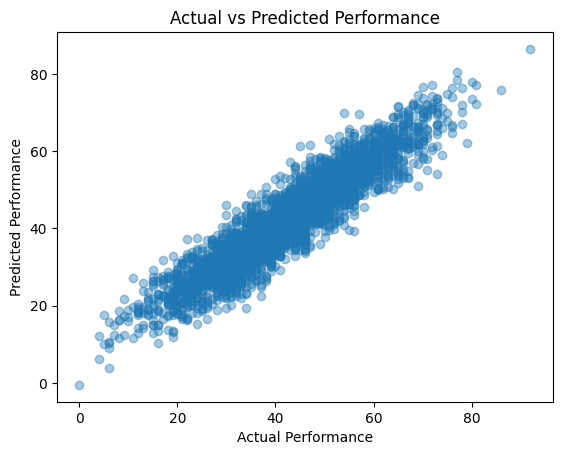

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test_p, y_pred_p, alpha=0.4)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Actual vs Predicted Performance")
plt.show()


In [ ]:
joblib.dump(perf_model, "models/performance_model.pkl")
print("Performance model saved!")


Performance model saved!


In [ ]:
# Second model
y_burn = df["burnout_risk"]

X_burn = df.drop(columns=[
    "burnout_risk",
    "performance_score",
    "date",
    "student_id"
])

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_burn, y_burn,
    test_size=0.2,
    random_state=42,
    stratify=y_burn
)
burnout_model = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        class_weight="balanced",
        random_state=42
    ))
])


In [ ]:
burnout_model.fit(X_train_b, y_train_b)

y_pred_b = burnout_model.predict(X_test_b)

print("Burnout Model Results")
print(confusion_matrix(y_test_b, y_pred_b))
print(classification_report(y_test_b, y_pred_b))


Burnout Model Results
[[2747   34]
 [  21  198]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2781
           1       0.85      0.90      0.88       219

    accuracy                           0.98      3000
   macro avg       0.92      0.95      0.93      3000
weighted avg       0.98      0.98      0.98      3000



In [ ]:
joblib.dump(burnout_model, "models/burnout_model.pkl")
print("Burnout model saved!")


Burnout model saved!
